## Import the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('beer_rnd.xlsx')
df.head()

,cost,size,alcohol,reputat,color,aroma,taste,rnd1,rnd2,rnd3,rnd4,rnd5,rnd6,rnd7
0,10,15,20,85,40,30,50,40,80,65,25,90,45,40
1,100,70,50,30,75,60,80,70,55,45,25,95,95,60
2,65,30,35,80,80,60,90,45,90,65,90,20,95,35
3,0,0,20,30,80,90,100,85,30,45,85,40,80,5
4,10,25,10,100,50,40,60,20,5,25,25,20,25,80


In [4]:
df.shape

(99, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cost     99 non-null     int64
 1   size     99 non-null     int64
 2   alcohol  99 non-null     int64
 3   reputat  99 non-null     int64
 4   color    99 non-null     int64
 5   aroma    99 non-null     int64
 6   taste    99 non-null     int64
 7   rnd1     99 non-null     int64
 8   rnd2     99 non-null     int64
 9   rnd3     99 non-null     int64
 10  rnd4     99 non-null     int64
 11  rnd5     99 non-null     int64
 12  rnd6     99 non-null     int64
 13  rnd7     99 non-null     int64
dtypes: int64(14)
memory usage: 11.0 KB


In [11]:
x = df.values
Corr = np.corrcoef(x.T)

In [12]:
Corr.shape

(14, 14)

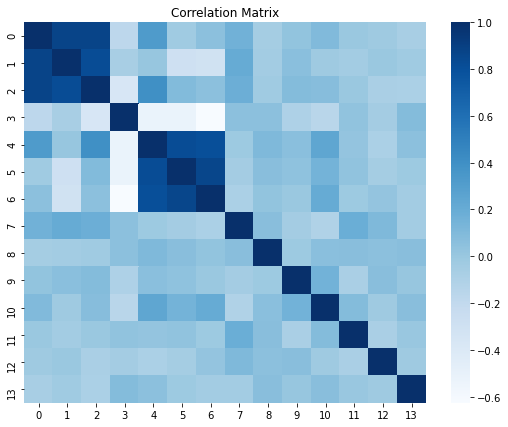

In [13]:
plt.figure(figsize=(9,7))
sns.heatmap(Corr, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

### Find $\tilde{x}_{n}$ from $x_{n}$

In [14]:
x_mean = np.mean(x, axis=0)
x_n = (x - x_mean).T
print(x_n.shape)

(14, 99)


In [17]:
x_n[:,0]

array([-17.77777778,  -7.22222222,  -3.88888889,  29.44444444,
       -23.88888889, -26.11111111, -30.55555556,  -2.77777778,
        27.57575758,  15.05050505, -21.51515152,  43.18181818,
        -2.02020202, -11.61616162])

In [18]:
C1 = np.cov(x_n)
eig_val, eig_vec = np.linalg.eig(C1)

In [19]:
eig_val

array([1616.52626273, 1338.81303611,   65.30191908,    6.20935149,
         17.81986474,   39.18349257,  303.1720361 ,  492.70349964,
        976.95600869,  941.02288497,  890.46459407,  602.74579412,
        695.5370284 ,  733.76170825])

### Get the top eigen values and eigen vectors

In [20]:
# eig_sorted = np.sort(eig_val)[::-1]
arg_sort = np.argsort(eig_val)[::-1]

eig_vec_ls = []
eig_val_ls = []
imp_vec = arg_sort[:3]  

for i in imp_vec:
    lam = eig_val[i]
    vec = eig_vec[:,i]
    eig_val_ls.append(lam)
    eig_vec_ls.append(vec)
print(eig_val_ls)
print(eig_vec_ls)

[1616.526262726838, 1338.8130361055892, 976.9560086867081]
[array([ 0.70193013,  0.37201503,  0.2725436 , -0.32948115,  0.26089232,
        0.14239528,  0.14929638,  0.1630631 , -0.02522316,  0.08848518,
        0.17821216,  0.01762618, -0.01281384, -0.09022515]), array([ 0.28861251,  0.31249978,  0.06952238,  0.41877894, -0.30882442,
       -0.41533076, -0.37304177,  0.33366758, -0.0672483 , -0.10673324,
       -0.3129719 ,  0.03056463,  0.0527614 , -0.05373518]), array([ 0.12300754,  0.07872308,  0.04213548,  0.08747049, -0.03452337,
       -0.08573623, -0.08696527, -0.46698381, -0.37250314, -0.05412334,
        0.02298411, -0.11440093, -0.75987971,  0.04842517])]


### Estimate $V$

In [23]:
eig_val_arr = np.array(eig_val_ls)
lambda1 = np.diag(eig_val_arr)
eig_vec_mat = np.matrix(eig_vec_ls).T
V = eig_vec_mat@np.sqrt(lambda1)  ## np.matmul() matrix multiplication
# V = np.matmul(eig_vec_mat,np.sqrt(lambda1))
print(V)

[[ 28.22183629  10.56027235   3.8447599 ]
 [ 14.95725385  11.43430264   2.46059196]
 [ 10.95790115   2.54380952   1.31699901]
 [-13.24713481  15.32303516   2.7340034 ]
 [ 10.48944915 -11.29982209  -1.07907277]
 [  5.72515136 -15.19686717  -2.67979693]
 [  6.00261733 -13.64952169  -2.7182121 ]
 [  6.55612267  12.20882815 -14.59618394]
 [ -1.01412339  -2.46060145 -11.64306814]
 [  3.55763937  -3.90534714  -1.69169522]
 [  7.16520659 -11.45157729   0.7183981 ]
 [  0.70867892   1.11835357  -3.57574919]
 [ -0.51519401   1.93052865 -23.75102478]
 [ -3.62759658  -1.96615922   1.51359157]]


### Compute $\sigma^{2}_{i}, i=0,1,2...$ and estimate S

In [29]:
var_ls = []
x_var = np.var(x_n, axis=1)

for i in range(V.shape[0]):
    s = np.sum(np.square(np.ravel(V[i,:])))
    sig_2 = x_var[i] - s
    var_ls.append(sig_2)
S = np.diag(np.array(var_ls))
print(S.shape)

(14, 14)


### Dimensionality reduction transformation

In [30]:
C1_inv = np.linalg.inv(C1)
W = V.T@C1_inv
print(W.shape)

(3, 14)


In [31]:
W

matrix([[ 0.01745832,  0.00925271,  0.00677867, -0.00819482,  0.00648888,
          0.00354164,  0.00371328,  0.00405569, -0.00062735,  0.00220079,
          0.00443247,  0.0004384 , -0.0003187 , -0.00224407],
        [ 0.00788779,  0.00854063,  0.00190005,  0.01144524, -0.00844018,
         -0.011351  , -0.01019524,  0.00911914, -0.0018379 , -0.00291702,
         -0.00855353,  0.00083533,  0.00144197, -0.00146858],
        [ 0.00393545,  0.00251863,  0.00134806,  0.00279849, -0.00110453,
         -0.00274301, -0.00278233, -0.01494047, -0.0119177 , -0.0017316 ,
          0.00073534, -0.00366009, -0.02431125,  0.00154929]])

In [33]:
z = W@x_n
z1 = z.T
z1.shape

(99, 3)

### Scatter the data in a 3-d plane

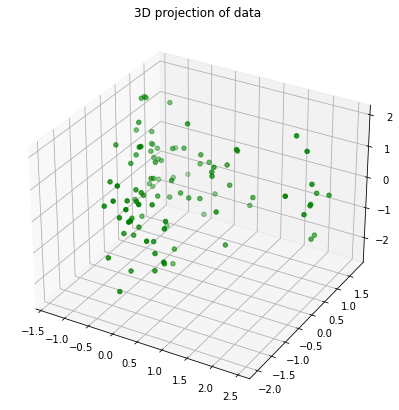

In [36]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(9,7))
ax = plt.axes(projection="3d")
ax.scatter(np.ravel(z1[:,0]), np.ravel(z1[:,1]), np.ravel(z1[:,2]),color='green')
plt.title("3D projection of data")
plt.show()